<a href="https://colab.research.google.com/github/C4st3ll4n/google_colab/blob/master/GANMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
tf.reset_default_graph()

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('mnist/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

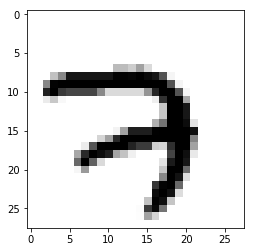

In [6]:
plt.imshow(mnist.train.images[0].reshape(28,28), cmap="Greys")

In [0]:
import numpy as np

In [8]:
imagem1 = np.arange(0,784).reshape(28,28)
imagem1

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27],
       [ 28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55],
       [ 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83],
       [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111],
       [112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
        138, 139],
       [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167],
       [16

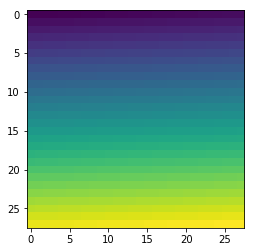

In [9]:
plt.imshow(imagem1)

In [0]:
imagem2 = np.random.normal(size=784).reshape(28,28)

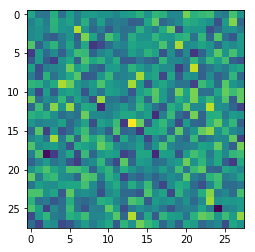

In [11]:
plt.imshow(imagem2)

In [0]:
ruido_ph = tf.placeholder(tf.float32, [None, 100])

In [0]:
def gerador(ruido, reuse=tf.AUTO_REUSE):
    with tf.variable_scope('gerador', reuse=reuse):
        #100 => 128 => 128 => 0784
        camada_oculta1 = tf.nn.relu(tf.layers.dense(inputs=ruido, units=128))
        camada_oculta2 = tf.nn.relu(tf.layers.dense(inputs=camada_oculta1, units=128))
        camada_saida = tf.layers.dense(inputs=camada_oculta2, units=784, activation=tf.nn.tanh)
        return camada_saida

In [0]:
imagens_reais_ph = tf.placeholder(tf.float32, [None, 784])

In [0]:
def discriminador(X, reuse=tf.AUTO_REUSE):
    with tf.variable_scope('driscriminador', reuse= reuse):
        #784 => 128 => 128 => 1
        camada_oculta1 = tf.nn.relu(tf.layers.dense(inputs=X, units=128))
        camada_oculta2 = tf.nn.relu(tf.layers.dense(inputs=camada_oculta1, units=128))
        logits = tf.layers.dense(inputs=camada_oculta2, units=1)
        return logits

In [0]:
#tf.reset_default_graph()
logits_imagens_reais = discriminador(imagens_reais_ph)
logits_imagens_ruidos = discriminador(gerador(ruido_ph))

erro_discriminador_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits
                                         (logits= logits_imagens_reais, labels=
                                          tf.ones_like(logits_imagens_reais*0.9
                                                       )))

erro_discriminador_ruido = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits
                                         (logits= logits_imagens_ruidos, labels=
                                          tf.zeros_like(logits_imagens_ruidos
                                                       )))

erro_discriminador = erro_discriminador_real + erro_discriminador_ruido

erro_gerador = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=logits_imagens_ruidos, labels = tf.ones_like(logits_imagens_ruidos)))

In [19]:
variaveis = tf.trainable_variables()
variaveis

[<tf.Variable 'driscriminador/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'driscriminador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'driscriminador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'driscriminador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'driscriminador/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'driscriminador/dense_2/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/kernel:0' shape=(100, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/kernel:0' shape=(128, 784) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/bias:0' shape=(784,) dtype=float32_ref>]

In [25]:
variaveis_discriminador = [v for v in variaveis if 'driscriminador' in v.name]
variaveis_discriminador

[<tf.Variable 'driscriminador/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'driscriminador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'driscriminador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'driscriminador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'driscriminador/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'driscriminador/dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [0]:
variaveis_gerador = [v for v in variaveis if 'gerador' in v.name]

In [0]:
treinamento_discriminador = tf.train.AdamOptimizer().minimize(erro_discriminador, var_list=variaveis_discriminador)
treinamento_gerador = tf.train.AdamOptimizer().minimize(erro_gerador, var_list=variaveis_gerador)

In [35]:
batch_size = 100 
amostras_teste = []

with tf.Session() as sessao:
    sessao.run(tf.global_variables_initializer())
    # ruido_teste = np.random.uniform(-1,1, size=(1,100))
    # amostra = sessao.run(gerador(ruido=ruido_ph, reuse =True), feed_dict={ruido_ph:ruido_teste})

    # batch = mnist.train.next_batch(100)
    # imgs_batch = batch[0].reshape((100, 784))
    # imgs_batch = imgs_batch * 2 - 1
    # result = sessao.run(discriminador(imagens_reais_ph, True), feed_dict={imagens_reais_ph:imgs_batch})
    # r2 = sessao.run(tf.nn.sigmoid(result))

    # ex = tf.constant([[1,2,3], [3,4,5]])
    # print("{}".format(sessao.run(tf.ones_like(ex))))

    for epoca in range(1500):
        num_batches = mnist.train.num_examples // batch_size

        for i in range(num_batches):
            b = mnist.train.next_batch(batch_size)
            img = b[0].reshape((100, 784))
            img = img * 2 - 1

            b_ruido = np.random.uniform(-1, 1, size=(batch_size, 100))

            _, custod = sessao.run([treinamento_discriminador, erro_discriminador],
                                   feed_dict={imagens_reais_ph: img, 
                                              ruido_ph: b_ruido})
            
            _, custog = sessao.run([treinamento_gerador, erro_gerador],
                                   feed_dict={ruido_ph: b_ruido})

        print("Época: {}\nErro D:{}\nErro G:{}\n".format(str(epoca+1), custod, custog))

        ruido_teste = np.random.uniform(-1, 1, size=(1,100))

        img_gerada = sessao.run(gerador(ruido_ph),
                                    feed_dict={
                                        ruido_ph:ruido_teste
                                    })
            
        amostras_teste.append(img_gerada)



Época: 1
Erro D:1.152062177658081
Erro G:7.321987152099609

Época: 2
Erro D:7.0828142166137695
Erro G:1.9022362232208252

Época: 3
Erro D:2.5390849113464355
Erro G:3.057990074157715

Época: 4
Erro D:0.14951804280281067
Erro G:7.960460662841797

Época: 5
Erro D:0.7396227717399597
Erro G:1.7548366785049438

Época: 6
Erro D:0.44257014989852905
Erro G:5.545651912689209

Época: 7
Erro D:1.0670368671417236
Erro G:7.218137264251709

Época: 8
Erro D:0.691527247428894
Erro G:3.7741341590881348

Época: 9
Erro D:2.1197900772094727
Erro G:2.0790822505950928

Época: 10
Erro D:0.5850046873092651
Erro G:5.319828033447266

Época: 11
Erro D:1.0709354877471924
Erro G:1.734737515449524

Época: 12
Erro D:0.7917020320892334
Erro G:4.482089042663574

Época: 13
Erro D:0.703488826751709
Erro G:2.3476264476776123

Época: 14
Erro D:1.1971290111541748
Erro G:2.225855588912964

Época: 15
Erro D:1.4315683841705322
Erro G:3.467548131942749

Época: 16
Erro D:1.6797995567321777
Erro G:2.6603477001190186

Época: 17
Er

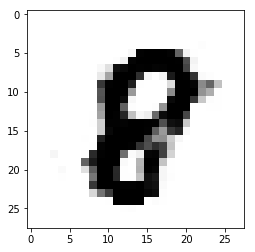

In [44]:
plt.imshow(amostras_teste[1499].reshape(28,28), cmap='Greys')